In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('data.csv', index_col=0, delimiter="\t")
df

,Среднегодовой объем выпускаемой продукции (тыс. руб.),Среднее списочное число рабочих (чел.),Количество посещений больниц в связи с травмами
Номер предприятия,,,
1,4010,4270,937
2,3016,4250,702
3,1950,2850,389
4,4100,4750,987
5,3116,3550,632
6,3266,3900,665
7,2100,2850,338
8,2986,3650,572
9,2160,2750,368


In [8]:
k = 5
n = len(df)
r = (max(df['Среднегодовой объем выпускаемой продукции (тыс. руб.)']) -
     min(df['Среднегодовой объем выпускаемой продукции (тыс. руб.)']))
h = r / k
print(n, k, r, h)

25 5 2260 452.0


In [118]:
line_ndf = pd.Series(df['Среднегодовой объем выпускаемой продукции (тыс. руб.)'].to_numpy().reshape(-1),
                     index=df['Среднегодовой объем выпускаемой продукции (тыс. руб.)'].to_numpy().reshape(-1))
line_ndf
scut_df = pd.cut(line_ndf, bins=k, right=False, retbins=True, precision=1)[0].rename("Диапазон")
scut_df
cut_df = df.merge(scut_df, left_on='Среднегодовой объем выпускаемой продукции (тыс. руб.)', right_index=True)
cut_group = cut_df.groupby('Диапазон')
cut_df

C:\Users\artem\AppData\Local\Temp\ipykernel_19384\2510856613.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cut_group = cut_df.groupby('Диапазон')


,Среднегодовой объем выпускаемой продукции (тыс. руб.),Среднее списочное число рабочих (чел.),Количество посещений больниц в связи с травмами,Диапазон
Номер предприятия,,,,
1,4010,4270,937,"[3758.0, 4212.3)"
2,3016,4250,702,"[2854.0, 3306.0)"
3,1950,2850,389,"[1950.0, 2402.0)"
4,4100,4750,987,"[3758.0, 4212.3)"
5,3116,3550,632,"[2854.0, 3306.0)"
6,3266,3900,665,"[2854.0, 3306.0)"
7,2100,2850,338,"[1950.0, 2402.0)"
8,2986,3650,572,"[2854.0, 3306.0)"
9,2160,2750,368,"[1950.0, 2402.0)"


## Число предприятий

In [119]:
count_series = cut_group['Диапазон'].count().rename("Количество предприятий").sort_values()
count_series

Диапазон
[3306.0, 3758.0)     1
[2402.0, 2854.0)     4
[3758.0, 4212.3)     4
[1950.0, 2402.0)     7
[2854.0, 3306.0)    11
Name: Количество предприятий, dtype: int64

## Совокупный объём выпущенной продукции

In [120]:
cut_group['Среднегодовой объем выпускаемой продукции (тыс. руб.)'].sum().rename("Совокупный объём выпущенной продукции").sort_values()

Диапазон
[3306.0, 3758.0)     3403
[2402.0, 2854.0)    10070
[1950.0, 2402.0)    14900
[3758.0, 4212.3)    16080
[2854.0, 3306.0)    34180
Name: Совокупный объём выпущенной продукции, dtype: int64

## Постройте аналитическую таблицу, позволяющую выявить зависимость между объемом выпускаемой продукции и средним числом случаев травматизма, приходящихся на одного работающего

In [124]:
travm_df = df[['Среднегодовой объем выпускаемой продукции (тыс. руб.)', 'Среднее списочное число рабочих (чел.)', 'Количество посещений больниц в связи с травмами']]
travm_df = travm_df.assign(Травматизм = lambda row: (row['Количество посещений больниц в связи с травмами'] / row['Среднее списочное число рабочих (чел.)']))

travm_df = travm_df.merge(scut_df, left_on='Среднегодовой объем выпускаемой продукции (тыс. руб.)', right_index=True)
travm_df = travm_df.sort_values(by=["Среднегодовой объем выпускаемой продукции (тыс. руб.)", 'Среднее списочное число рабочих (чел.)'], ascending=[False, False])

travm_df

,Среднегодовой объем выпускаемой продукции (тыс. руб.),Среднее списочное число рабочих (чел.),Количество посещений больниц в связи с травмами,Травматизм,Диапазон
Номер предприятия,,,,,
25,4210,4850,907,0.187010,"[3758.0, 4212.3)"
4,4100,4750,987,0.207789,"[3758.0, 4212.3)"
1,4010,4270,937,0.219438,"[3758.0, 4212.3)"
24,3760,4150,810,0.195181,"[3758.0, 4212.3)"
13,3403,3750,660,0.176000,"[3306.0, 3758.0)"
6,3266,3900,665,0.170513,"[2854.0, 3306.0)"
17,3236,3650,690,0.189041,"[2854.0, 3306.0)"
15,3146,3550,582,0.163944,"[2854.0, 3306.0)"
15,3146,3550,582,0.163944,"[2854.0, 3306.0)"


<Axes: xlabel='Среднегодовой объем выпускаемой продукции (тыс. руб.)'>

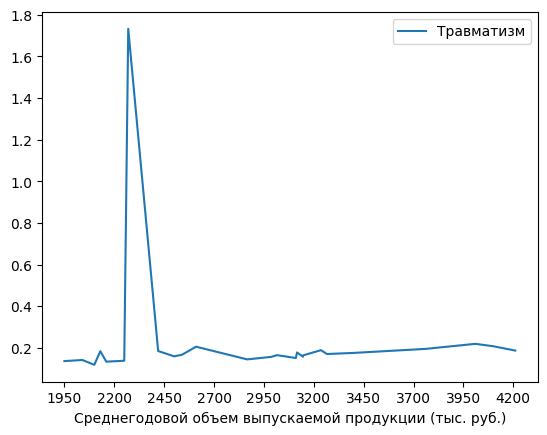

In [135]:
travm_df.plot(x='Среднегодовой объем выпускаемой продукции (тыс. руб.)', y='Травматизм', xticks=range(1950, 4200 + 1, 250))